## Import

In [1]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import datasets
from sklearn.model_selection import train_test_split

In [2]:
import urllib
url = "https://raw.githubusercontent.com/Jwizzed/ml-journey/main/TT.py"
urllib.request.urlretrieve(url, "TT.py")
import TT

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/krittinsetdhavanich/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krittinsetdhavanich/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
TT.info()

+-----------------------+---------------------------------------------------------------+
| Function              | Description                                                   |
+=======================+===============================================================+
| report_dir            | Walks through dir_path returning its contents                 |
+-----------------------+---------------------------------------------------------------+
| unzip                 | Unzips a file                                                 |
+-----------------------+---------------------------------------------------------------+
| get_lines             | Read the contents of the file and return them as a list       |
+-----------------------+---------------------------------------------------------------+
| view_random_image     | Plots a random image from target_dir and target_class         |
+-----------------------+---------------------------------------------------------------+
| plot_sha

In [4]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

# Create data and send it to the device
x = torch.rand(size=(3, 4)).to(device)
x
# device = "cpu"
# device

tensor([[0.4516, 0.1738, 0.1294, 0.2173],
        [0.6709, 0.0770, 0.9177, 0.0695],
        [0.5250, 0.9511, 0.3739, 0.1527]], device='mps:0')

## Get data

In [5]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

 93%|███████████████████████████████████▍  | 15.0M/16.1M [00:02<00:00, 13.5MB/s]
100%|██████████████████████████████████████| 16.1M/16.1M [00:02<00:00, 8.02MB/s]


In [6]:
TT.unzip("real-or-fake-fake-jobposting-prediction.zip", delete_original=True)

Unzipped Successfully


In [7]:
!ls

Real Fake Job Posting Prediction.ipynb checkpoints
TT.py                                  fake_job_postings.csv
__pycache__


In [8]:
orig_df = pd.read_csv("fake_job_postings.csv")
df = orig_df.copy()
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


4it [00:00, 188.62it/s]


<Figure size 1200x800 with 0 Axes>

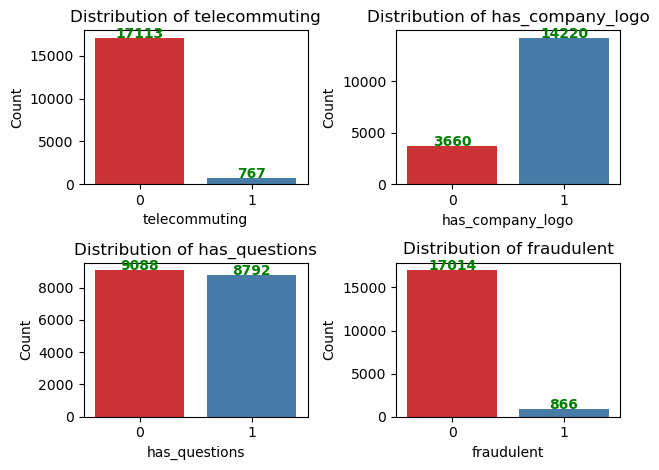

In [10]:
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

binary_columns = ["telecommuting", "has_company_logo", "has_questions", "fraudulent"]
TT.plot_binary_columns(df, binary_columns, show_number=True)

In [11]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Check what columns are we going to drop

#### salary_range (drop)

In [12]:
test_salary_df = df[pd.notna(df["salary_range"])]
test_salary_df["salary_range"] = test_salary_df["salary_range"].apply(lambda x: x.split("-")[-1])
test_salary_df.sort_values("salary_range", ascending=False).head(3) # I'm gonna drop the salary_range

/var/folders/54/bsd8kfld1_xcw8npb7rc2qgw0000gn/T/ipykernel_50326/3094895173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_salary_df["salary_range"] = test_salary_df["salary_range"].apply(lambda x: x.split("-")[-1])


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
4299,4300,Dog Daycare Attendant,"US, CA, West Hollywood",NaN,Sep,NaN,Healthy Spot is looking for a full-time or par...,NaN,NaN,0,0,1,Part-time,Not Applicable,NaN,Retail,NaN,0
9902,9903,Agent-Inbound Cust Svc,"US, TN, Spring Hill",NaN,Oct,Delivering superior customer services for over...,Job DescriptionAre you ready to start your sal...,RequirementsAs a Call Center Customer Service ...,Benefits :We offer our employees the following...,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
10785,10786,Part Time Agent-Inbound Customer Service,"US, TN, Spring Hill",NaN,Oct,Delivering superior customer services for over...,Job DescriptionAre you ready to start your sal...,RequirementsAs a Call Center Customer Service ...,Benefits :We offer our employees the following...,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0


#### others

In [13]:
df.title.unique().shape

(11231,)

In [14]:
def diff_check(df, column_name):
    _count = 0
    for item in df[column_name].unique():
        _count += 1

        fraudulent_df = df[(df[column_name] == item) & (df["fraudulent"] == 0)]
        non_fraudulent_df = df[(df[column_name] == item) & (df["fraudulent"] == 1)]

        if not fraudulent_df.empty and not non_fraudulent_df.empty:
            print(f"##### Drop {column_name} #####")
            return column_name
        else:
            pass
    return None


In [15]:
check_columns = ["title", "location", "department", "salary_range", "benefits", "employment_type", "required_experience", "required_education", "industry", "function"]
drop_columns = ["job_id"]
for column in check_columns:
    drop_columns.append(diff_check(df, column))

##### Drop title #####
##### Drop location #####
##### Drop department #####
##### Drop salary_range #####
##### Drop benefits #####
##### Drop employment_type #####
##### Drop required_experience #####
##### Drop required_education #####
##### Drop industry #####
##### Drop function #####


In [16]:
df.drop(columns=drop_columns, inplace=True)

In [17]:
df.head()

,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,0
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,0


In [18]:
df["text"] = df["company_profile"] + " " + df["description"] + " " + df["requirements"]
df.drop(columns=["company_profile", "description", "requirements"], inplace=True)
df.dropna(inplace=True)
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"We're Food52, and we've created a groundbreaki..."
1,0,1,0,0,"90 Seconds, the worlds Cloud Video Production ..."
2,0,1,0,0,Valor Services provides Workforce Solutions th...
3,0,1,0,0,Our passion for improving quality of life thro...
4,0,1,1,0,SpotSource Solutions LLC is a Global Human Cap...


In [19]:
num_before_preprocess_text = sum([len(text) for text in df.text])
num_before_preprocess_text

33941634

In [20]:
df["text"] = df.text.apply(TT.preprocess_text)
num_after_preprocess_text =  sum([len(text) for text in df.text])
num_after_preprocess_text

22013836

In [21]:
print(f"We just reduced {num_before_preprocess_text - num_after_preprocess_text} texts")

We just reduced 11927798 texts


In [22]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,food52 weve creat groundbreak awardwin cook si...
1,0,1,0,0,90 second world cloud video product service90 ...
2,0,1,0,0,valor servic provid workforc solut meet need c...
3,0,1,0,0,passion improv qualiti life geographi heart ev...
4,0,1,1,0,spotsourc solut llc global human capit manag c...


In [23]:
df["text"] = df['telecommuting'].astype(str).str.cat([df['has_company_logo'].astype(str), df['has_questions'].astype(str), df['text']], sep=' ')
df.drop(columns=["telecommuting", "has_company_logo", "has_questions"], inplace=True)
df.rename(columns={"fraudulent":"labels"}, inplace=True)
df.head()

,labels,text
0,0,0 1 0 food52 weve creat groundbreak awardwin c...
1,0,0 1 0 90 second world cloud video product serv...
2,0,0 1 0 valor servic provid workforc solut meet ...
3,0,0 1 0 passion improv qualiti life geographi he...
4,0,0 1 1 spotsourc solut llc global human capit m...


Sometime it might not necessary to preprocess text if are going to tokenize with some model

In [24]:
df.iloc[0].text

'0 1 0 food52 weve creat groundbreak awardwin cook site support connect celebr home cook give everyth need one placew top editori busi engin team focus use technolog find new better way connect peopl around specif food interest offer superb highli curat inform food cook attract talent home cook contributor countri also publish wellknown profession like mario batali gwyneth paltrow danni meyer partnership whole food market random housefood52 name best food websit jame beard foundat iacp featur new york time npr pando daili techcrunch today showwer locat chelsea new york citi food52 fastgrow jame beard awardwin onlin food commun crowdsourc curat recip hub current interview full parttim unpaid intern work small team editor execut develop new york citi headquartersreproduc andor repackag exist food52 content number partner site huffington post yahoo buzzfe variou content manag systemsresearch blog websit provis food52 affili programassist daytoday affili program support screen affili assis

### Create Model

In [25]:
def tokenize(df):
    return tokenizer(df["text"])

In [26]:
from datasets import Dataset


dataset = Dataset.from_pandas(df[:len(df)//2])
dataset = dataset.train_test_split(test_size=0.2, seed=42)
dataset = dataset.remove_columns(["__index_level_0__"])
dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 5052
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 1263
    })
})

In [27]:
id2label = {0: "POSITIVE", 1: "NEGATIVE"}
label2id = {"NEGATIVE":0, "POSITIVE":1}

In [28]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification,TrainingArguments, Trainer, DataCollatorWithPadding
tokenizer = AutoTokenizer.from_pretrained("google/electra-base-discriminator")

model = AutoModelForSequenceClassification.from_pretrained("google/electra-base-discriminator",num_labels=2, id2label=id2label, label2id=label2id).to(device)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
# all_length = [len(text) for text in df.text]
# max_length = int(np.percentile(all_length, 95))
max_length = 128


max_length

128

In [30]:
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    ).to(device)


tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/5052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1263 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 5052
    })
    test: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1263
    })
})

In [31]:
data_collator = DataCollatorWithPadding(tokenizer)

In [32]:
def compute_metrics(eval_pred):
    acc_metric = datasets.load_metric('accuracy')
    f1_metric = datasets.load_metric('f1')
    y_logits, y_labels = eval_pred
    y_pred = np.argmax(y_logits, axis=-1)
    acc = acc_metric.compute(predictions=y_pred, references=y_labels)['accuracy']
    f1 = f1_metric.compute(predictions=y_pred, references=y_labels, average='macro')['f1']
    
    return {'accuracy':acc, 'f1':f1}

In [33]:
training_args = TrainingArguments(
    output_dir="checkpoints",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False
)

trainer = Trainer(
    model=model.to(device),
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

/Users/krittinsetdhavanich/pytorch-test/torch_env/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a ElectraTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.073559,0.970705,0.492567
2,0.087600,0.066589,0.988915,0.887782
3,0.087600,0.067694,0.989707,0.894186
4,0.029600,0.058499,0.989707,0.897359
5,0.015300,0.050031,0.991291,0.920295


/var/folders/54/bsd8kfld1_xcw8npb7rc2qgw0000gn/T/ipykernel_50326/1295628286.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  acc_metric = datasets.load_metric('accuracy')


TrainOutput(global_step=1580, training_loss=0.0426867058005514, metrics={'train_runtime': 3509.1331, 'train_samples_per_second': 7.198, 'train_steps_per_second': 0.45, 'total_flos': 1661546314598400.0, 'train_loss': 0.0426867058005514, 'epoch': 5.0})

In [34]:
trainer.evaluate()

{'eval_loss': 0.05003136023879051,
 'eval_accuracy': 0.9912905779889153,
 'eval_f1': 0.9202948854020252,
 'eval_runtime': 31.2998,
 'eval_samples_per_second': 40.352,
 'eval_steps_per_second': 2.524,
 'epoch': 5.0}